In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

au = 149597870.691 #km
sr = 701407 #km
Xc = 700
Yc = 700
Ra = 630
Rb = 593
Fia = 20.62 * np.pi/180
Fib = 21.424 * np.pi/180
Tetaa = -2.535 * np.pi/180
Tetab = 3.089 * np.pi/180
Dista = 0.966587 * au
Distb = 1.026675 * au

In [2]:
# Transform the coordinates (X1) of satellite A or B into the HEEQ system 
# Fi - Heliographic (HEEQ) longitude, degrees 
# Theta - Heliographic (HEEQ) latitude, degrees
def to_HEEQ(x1, fi, theta):
    x=x1*np.cos(fi)*np.cos(theta)
    y=x1*np.sin(fi)*np.cos(theta)
    z=x1*np.sin(theta)
    return (x, y, z)

In [3]:
# Find radiuses of circle at the Sun parallels
# rad - radius in pixels

def rad_parallel_cut(rad):
    out=np.zeros((2*rad+1, 1))
    for it in range(1, rad+1):
        out[it]=np.round(np.sqrt((rad**2-(rad-it+1)**2)))
    out[rad+1:]=np.flip(out[0:rad], 0)
    return out

In [4]:
# Transormation of coordinates of point(X1,Y1,Z1) in a system of a satellite to HEEQ 
# Fi - Heliographic (HEEQ) longitude, degrees 
# Theta - Heliographic (HEEQ) latitude, degrees
def point_sat_to_HEEQ(Fi,Theta,X1,Y1,Z1):
    X=np.cos(Fi)*np.cos(Theta)*X1-np.sin(Fi)*Y1-np.cos(Fi)*np.sin(Theta)*Z1
    Y=np.sin(Fi)*np.cos(Theta)*X1+np.cos(Fi)*Y1-np.sin(Theta)*np.sin(Fi)*Z1
    Z=np.sin(Theta)*X1+np.cos(Theta)*Z1
    return (X, Y, Z)

In [5]:
# Transormation of coordinates of a point (in HEEQ) to the coordinate system of a satellite 
# Fi - Heliographic (HEEQ) longitude, degrees 
# Theta - Heliographic (HEEQ) latitude, degrees 

def HEEQ_to_point_sat(Fi,Theta,X1,Y1,Z1):
    X=np.cos(Fi)*np.cos(Theta)*X1+np.sin(Fi)*np.cos(Theta)*Y1+np.sin(Theta)*Z1
    Y=-np.sin(Fi)*X1+np.cos(Fi)*Y1
    Z=-np.cos(Fi)*np.sin(Theta)*X1-np.sin(Fi)*np.sin(Theta)*Y1+np.cos(Theta)*Z1
    return (X, Y, Z)

In [6]:
# Detetrime pixel coordinates (i,j) from  the Cartesian coordinates 
# rad - radius of Sun in pixels
# dist_top  - Distance from the top (grid start) to the Sun from the top
# nanleft - Part of the grid on the left that does not cover the Sun 
# Y,Z - Cartesian coordinates 
# R - radius of Sun atmosphere in km
# rad_circle - radiuses of circles at Sun parallels
def coord_real_to_pixel(rad, dist_top,nanleft, rad_circle, Y, Z, R):
    i=rad+dist_top-int(Z*(rad*1./R))
    j=int(nanleft[i-dist_top][0]+rad_circle[i-dist_top][0]+Y*(rad*1./R))
    return (i, j)

In [7]:
# Detetrime Cartesian coordinates of a point (M,N) in the coordinate system of a satellite (in km)
# nanleft  - Part of the grid on the left that does not cover the Sun 
# dist_top - Distance from the top (grid start) to the Sun from the top 
# rad_circle -radiuses of circles at Sun parallels 
# R - radius of Sun atmosphere  in km
# rad - radius of Sun in pixels
def coord_pixel_to_real(i,j,nanleft,dist_top,rad_circle,R,rad):
    Y=(j-nanleft[i-dist_top][0]-rad_circle[i-dist_top][0])*(R*1./rad)
    Z=(-(i-rad-dist_top))*(R*1./rad)
    X=np.sqrt(R**2-Y**2-Z**2)
    return (X, Y, Z)

In [8]:
#Sat A:
print to_HEEQ(Dista, Fia, Tetaa)
print point_sat_to_HEEQ(Fia, Tetaa, 5, 5, 5)
print HEEQ_to_point_sat(Fia, Tetaa, 3.121242676471288, 6.516683445214891,4.773958632983378)
print coord_pixel_to_real(650, 650, Xc-rad_parallel_cut(Ra), Yc-Ra, rad_parallel_cut(Ra), sr, Ra)
print coord_real_to_pixel(Ra, Yc - Ra, Xc - rad_parallel_cut(Ra), rad_parallel_cut(Ra), -55667.22222222222, 55667.22222222222, sr)


(135203398.61203763, 50873486.269681975, -6395580.83450877)
(3.121242676471288, 6.516683445214891, 4.773958632983378)
(5.0, 5.0, 4.999999999999999)
(696974.9639614923, -55667.22222222222, 55667.22222222222)
(650, 650)


In [9]:
#Sat B
print to_HEEQ(Distb, Fib, Tetab)

(142768141.45655528, 56019221.35015723, 8276434.171170009)


In [10]:
rad_parallel_cut(10)


array([[ 0.],
       [ 0.],
       [ 4.],
       [ 6.],
       [ 7.],
       [ 8.],
       [ 9.],
       [ 9.],
       [10.],
       [10.],
       [10.],
       [10.],
       [10.],
       [ 9.],
       [ 9.],
       [ 8.],
       [ 7.],
       [ 6.],
       [ 4.],
       [ 0.],
       [ 0.]])

In [11]:
def mashtab (arr, maximum, minimum):
    ret = np.array(arr)
    ret[ret>maximum] = maximum
    ret[ret<minimum] = minimum
    return ret

In [12]:
Adata = np.array(pd.read_table('./data/txt/20071207_A_Dif_0435_0415.txt'))
Adata = Adata[:, :-1]
Bdata = np.array(pd.read_table('./data/txt/20071207_B_Dif_0435_0415.txt'))
Bdata = Bdata[:, :-1]

In [13]:
Adata2 = Adata.copy()
Adata2[Adata2==0]=-700
Bdata2 = Bdata.copy()
Bdata2[Bdata2==0]=-700

In [14]:
Adata3 = mashtab(Adata2, 50, -20)
Bdata3 = mashtab(Bdata2, 50, -20)
#Adata3 = 150 - Adata3
#Bdata3 = 150 - Bdata3

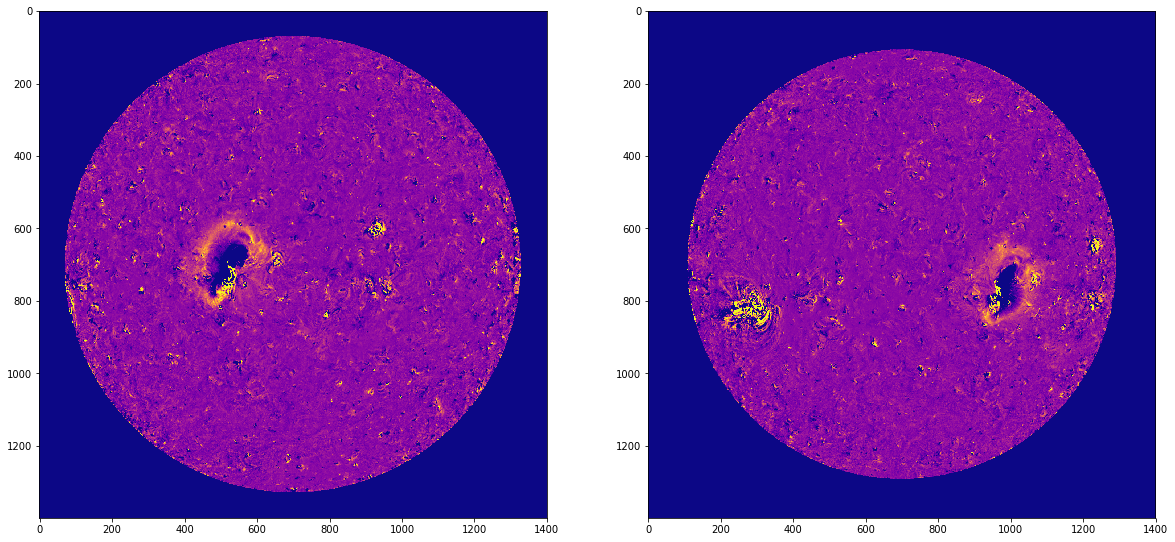

In [15]:
plt.figure(figsize=(20,10))
plt.subplot(1, 2, 1)
plt.imshow(Adata3, 'plasma')
plt.subplot(1, 2, 2)
plt.imshow(Bdata3, 'plasma')
plt.show()

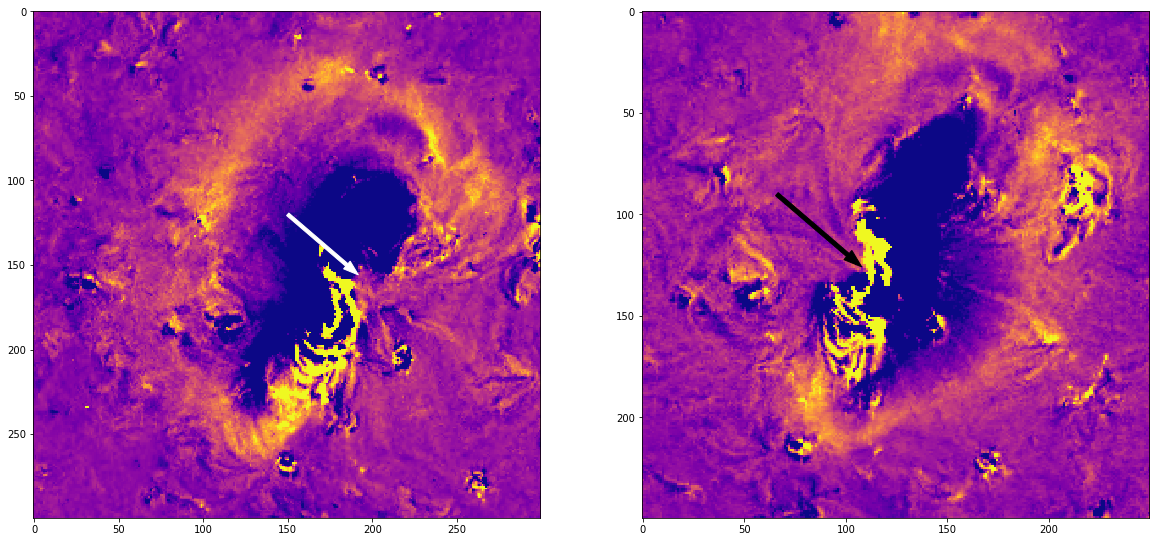

In [16]:
plt.figure(figsize=(20,10))
plt.subplot(1, 2, 1)
plt.imshow(Adata3[550:850, 350:650], 'plasma')
plt.arrow(150, 120, 35, 30, color = 'white', width = 2)
plt.subplot(1, 2, 2)
plt.imshow(Bdata3[650:900, 850:1100], 'plasma')
plt.arrow(66, 90, 35, 30, color = 'black', width = 2)
plt.show()